#En este Notebook veremos ejemplos de datos con variables categóricas.

In [2]:
# primero importamos las librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

Cargaremos los datos

In [3]:
url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"
df = pd.read_csv(url, sep=",")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


### Creamos un histograma

Como vimos antes, panda nos permite cargar desde un csv hosteado en la red. Usando el dataframe guardado en la variable "df", crearemos un histograma.

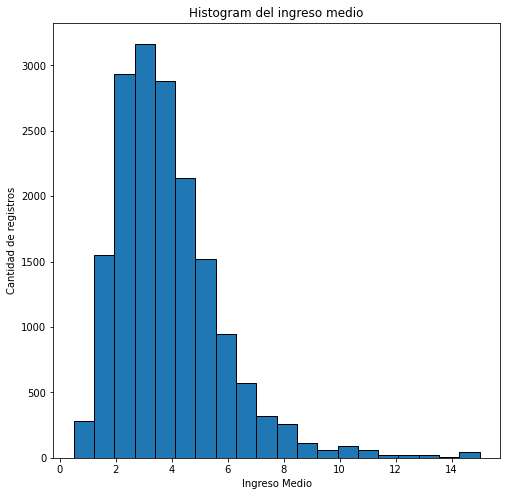

In [28]:
# Cargamos la columna median_income como variable y a graficar.
y = df['median_income']

# Definimos la cantidad de conjuntos que queremos usar para agrupar los valores.
num_bins = 20

# tamaño del grafico: (ancho, largo)
plt.figure(figsize=(8,8))

# Le definimos a Matplotlib que es un histograma con los valores de y agrupados en num_bis
plt.hist(y, num_bins, edgecolor='black')

# Asignamos Nombres a eje x, y asi como tambien el titulo del grafico
plt.xlabel('Ingreso Medio')
plt.ylabel('Cantidad de registros')
plt.title(r'Histogram del ingreso medio')

plt.show()

En este paso, tomamos una variable númerica y la dividimos en 20 clases. La variable num_bins indica las distintas clases o intervalos de clases.

Con eso, cada clase vendria siendo un posible valor de una variable categórica. Así contamos cuantos valores estan dentro de estos intervalos. Esto sería la frecuencia de cada clase.

**La función que crea el histograma lo hace automatico. Ahora transformaremos una variable numerica en una variable categórica y haremos un gráfico de torta.**

In [7]:
# usaremos la variable "median income"
Y = df['median_income']
Y

0        1.4936
1        1.8200
2        1.6509
3        3.1917
4        1.9250
          ...  
16995    2.3571
16996    2.5179
16997    3.0313
16998    1.9797
16999    3.0147
Name: median_income, Length: 17000, dtype: float64

In [8]:
Y.describe()

count    17000.000000
mean         3.883578
std          1.908157
min          0.499900
25%          2.566375
50%          3.544600
75%          4.767000
max         15.000100
Name: median_income, dtype: float64

Con la información de la función .describe() haremos las divisiones segun:

- sueldo muy bajo: < 1
- sueldo bajo: entre 1 y 2.5
- sueldo medio: entre 2.5 y 4
- sueldo alto: entre 4 y 5
- suelto muy alto: > 5

In [15]:
# Los gráficos de torta contarán el número datos entre los rangos y lo mostraremos en un gráfico.
n1 = Y.loc[Y < 1].count()
n2 = Y.loc[(Y >= 1) & (Y < 2.5)].count()
n3 = Y.loc[(Y >= 2.5) & (Y < 4)].count()
n4 = Y.loc[(Y >= 4) & (Y < 5)].count()
n5 = Y.loc[Y >= 5].count()
print(n1,n2,n3,n4,n5)

125 3810 6345 2955 3765


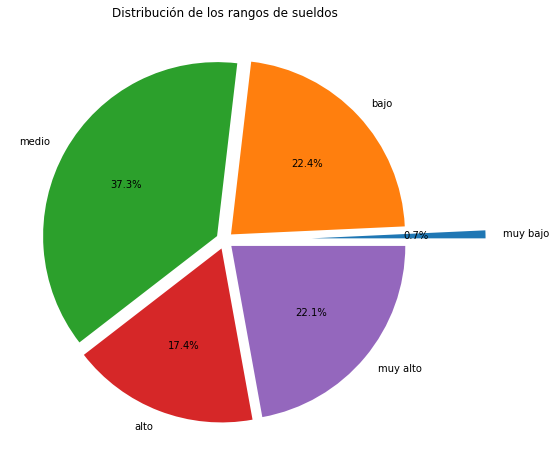

In [32]:
#Formato del grafico circular
datos = [n1, n2, n3, n4,n5]

# separación de cada trozo de la torta al centro 
exp = [0.5,0.05,0.05,0.05, 0.05]

# etiqueta de cada trozo
m = ['muy bajo','bajo','medio','alto', 'muy alto']

plt.figure(figsize=(8,8))

plt.title("Distribución de los rangos de sueldos")
plt.pie(datos, labels = m, explode = exp, autopct='%2.1f%%')
plt.show()